<a href="https://colab.research.google.com/github/KotarRohith/Concepts/blob/main/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1

__Q1__. Generate a random sample using a distribution of your choice via `np.random` package. Then, using normal distribution as a benchmark distribution (on the x-axis) please, 

a) Draw the histogram and interpret 

b) Draw Q-Q plot and interpret

[-0.75608625 -0.31517871  1.53119552  1.20025309  1.22943476 -0.34737957
 -0.369263    1.20557479  0.31923374 -0.53755564 -1.19249624 -1.56094749
  0.61307381  0.97930307  1.70129759  0.96009804 -0.19921726  0.33919718
 -0.73869956 -0.07146548  0.30675245 -1.67167855 -1.09475248  0.73108273
  0.89855199 -0.51301374 -0.05120277  1.015661    1.75603769  0.06560642
 -0.63215574  0.86799033 -0.84238996  0.00565722  1.53377112  0.73228879
  1.0189277   1.06825414 -1.38626345 -1.17492487 -2.45845238  1.73144795
 -0.44150975 -0.22619173  1.94478291 -0.54365293  0.11343284  0.37245588
  0.71218515  0.07766557  0.040261   -1.80487785  1.75681654 -0.09858054
  0.48263359  0.44407776 -0.52462818  0.51163756  0.23811268  0.25513022
  0.24017564  0.46388388  0.63062215  1.22308506 -0.54978314 -0.23215865
  0.28955154  0.58464421  0.09443016  0.46594829  0.42873243 -0.97164981
 -1.7510883   0.22454655 -2.37074979  2.84768278  0.750491    0.60297026
  0.95280719  0.36570948 -0.67639844  1.28478011 -0

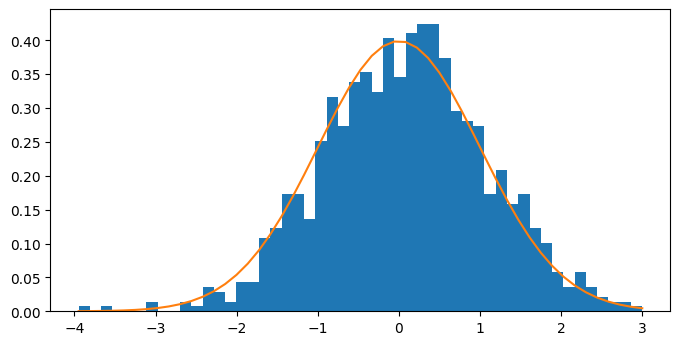

DescribeResult(nobs=1000, minmax=(-3.9472455931853685, 2.9990223999752135), mean=0.07947297694351484, variance=1.0155769697714137, skewness=-0.09734448228875886, kurtosis=0.14594759373670163)


In [14]:
# answer here
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy



mu = 0 
sigma = 1
n = 1000

sample =  np.random.normal(mu, sigma, n)

print(sample)

plt.figure(figsize=(8,4), dpi = 100)
_, bins, _ = plt.hist(sample, 50, density=1)
line = scipy.stats.norm.pdf(bins, mu, sigma)
plt.plot(bins,line)
plt.show()


print(stats.describe(sample))

**Inference**

*  The graph has nearly zero skewness of -0.09734 (neutrally skewed).
*  The mean of the data is 0.0794. And the variance is 1.015.


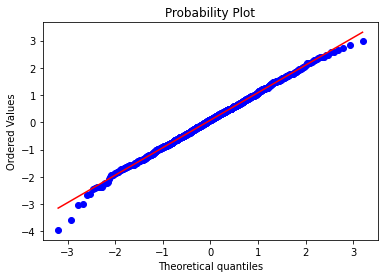

In [15]:
#Draw Q-Q plot and interpret
from scipy import stats
_ = stats.probplot(sample, plot=plt) # sample vs normal plot 


**Inference:**

The data is most similar to the normal/gaussian distribution.
The data is sorted in the ascending order and then plotted with the normalised plot.


__Q2__. Import `aapl.csv` data and plot the histogram and calculate the mean and standard deviation. Comment on these statistics.

In [33]:
import pandas as pd
# answer here
url='https://raw.githubusercontent.com/KotarRohith/Concepts/main/aapl.csv'
aapl_stock=pd.read_csv(url,index_col=['Date'])
aapl_stock

,Close
Date,
2019-12-31,73.412498
2020-01-02,75.087502
2020-01-03,74.357498
2020-01-06,74.949997
2020-01-07,74.597504
...,...
2021-07-26,148.990005
2021-07-27,146.770004
2021-07-28,144.979996


__Q3__. Given the mean return and standard deviation of apple stock, calculate the confidence interval for return mean.

**Hint-1:** Use z-table for the critical value and justify why you are using z-table.

**Hint-2:** The confidence interval can be computed as:
\begin{equation}
\overline{Y} + z_{\alpha/2, n-1}s_{\overline{Y}}
\end{equation}

In [34]:
# answer here
aapl_stock .describe()
 #returns during the priod


,Close
count,399.000000
mean,108.362989
std,25.008273
min,56.092499
25%,80.869999
50%,116.599998
75%,127.840000
max,149.149994


In [35]:
Stock_closing = aapl_stock.Close
stock_return = np.log(Stock_closing) - np.log(Stock_closing.shift(1))
stock_return #returns during the priod


Date
2019-12-31         NaN
2020-01-02    0.022560
2020-01-03   -0.009770
2020-01-06    0.007937
2020-01-07   -0.004714
                ...   
2021-07-26    0.002890
2021-07-27   -0.015012
2021-07-28   -0.012271
2021-07-29    0.004542
2021-07-30    0.001509
Name: Close, Length: 399, dtype: float64

In [40]:
# answer here
describe = stock_return.describe()
sd_return = describe["std"]
lenght_return = describe["count"]
print(sd_return)
print(describe["mean"])
error_margin = ((2.576)*(sd_return))/np.sqrt(lenght_return) # Z-Score for 99 percent is referred from :
error_margin

0.025573248242889635
0.0017250076926556615


0.00330209996854651

In [42]:
return_means = describe["mean"]

upper_bound = return_means + error_margin
lower_bound = return_means - error_margin
print(upper_bound, '\n')
print(lower_bound, '\n')

0.005027107661202171 

-0.0015770922758908486 



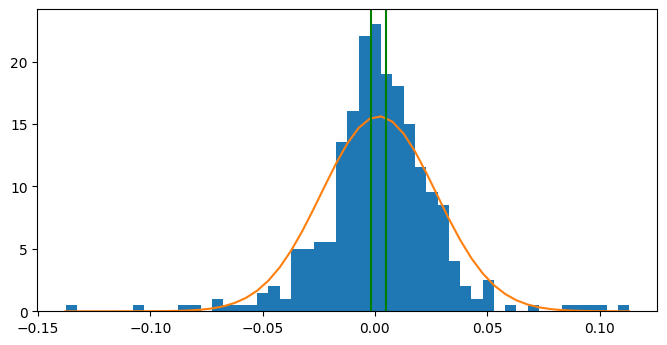

In [43]:
from scipy.stats import norm


plt.figure(figsize=(8,4), dpi = 100)
_, bins, _ = plt.hist(stock_return, 50, density=1)
mu_returns,sd_returns = norm.fit(stock_return[1:]) 
best_fit_line = scipy.stats.norm.pdf(bins, mu_returns, sd_returns)
plt.plot(bins, best_fit_line)
plt.axvline(upper_bound,color='g')
plt.axvline(lower_bound,color='g')
plt.show()
